In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


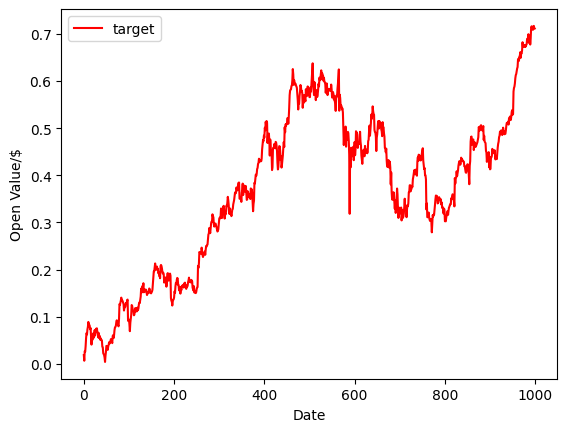

In [3]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

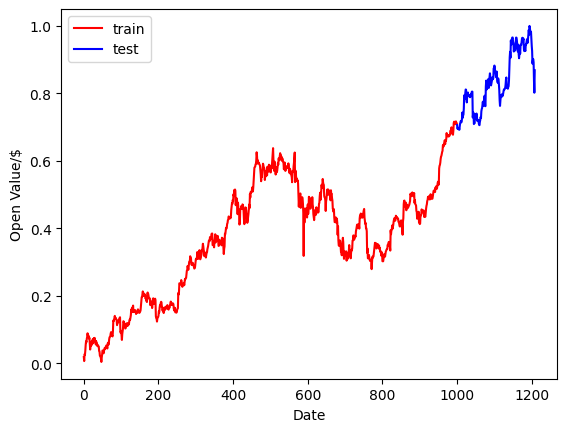

In [4]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Activation

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=96, return_sequences=True, input_shape=(50, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

# Adding Conv1D layers
model.add(Conv1D(filters=128, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')


c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history=model.fit(train_data,train_target,epochs=75,validation_data=(test_data,test_target))

Epoch 1/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0485 - val_loss: 0.0680
Epoch 2/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0062 - val_loss: 0.0301
Epoch 3/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0058 - val_loss: 0.0324
Epoch 4/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0050 - val_loss: 0.0239
Epoch 5/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0052 - val_loss: 0.0315
Epoch 6/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0043 - val_loss: 0.0215
Epoch 7/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0040 - val_loss: 0.0286
Epoch 8/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0040 - val_loss: 0.0528
Epoch 9/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0047 - val_loss: 0.0124
Epoch 10/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0043 - val_loss: 0.0378
Epoch 11/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0039 - val_loss: 0.0299
Epoch 12/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0

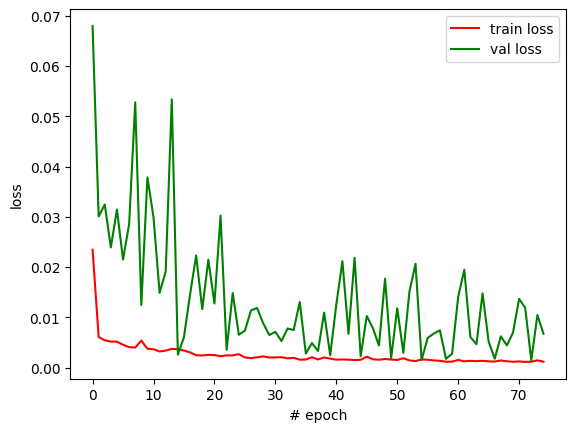

In [7]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
r2 score: 0.08444804963793173


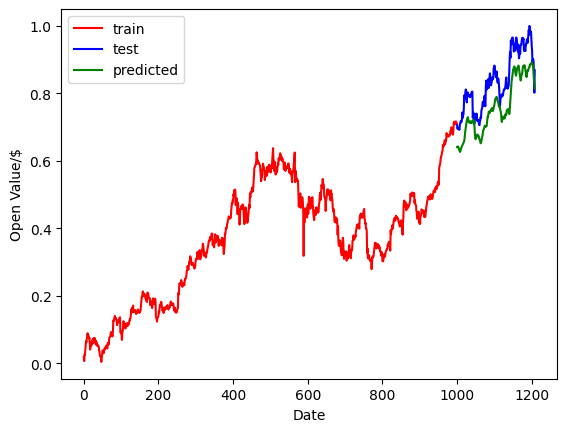

In [9]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

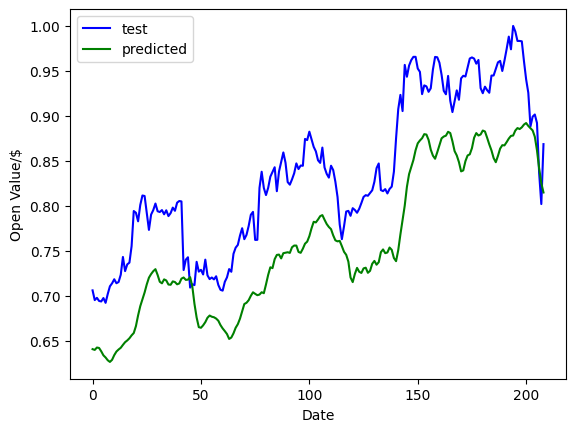

In [10]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [ ]:
model.save('LSTM-Stock-Market-Hybrid-Model.keras')